(404, 13) (404,)

Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 0s - loss: 571.7337 - val_loss: 643.6396
Epoch 2/100
 - 0s - loss: 570.4981 - val_loss: 548.1185
Epoch 3/100
 - 0s - loss: 321.7862 - val_loss: 115.8712
Epoch 4/100
 - 0s - loss: 95.2846 - val_loss: 84.0928
Epoch 5/100
 - 0s - loss: 77.2849 - val_loss: 71.9342
Epoch 6/100
 - 0s - loss: 63.2519 - val_loss: 61.9876
Epoch 7/100
 - 0s - loss: 57.0748 - val_loss: 62.2201
Epoch 8/100
 - 0s - loss: 53.6058 - val_loss: 53.3907
Epoch 9/100
 - 0s - loss: 49.7577 - val_loss: 69.4091
Epoch 10/100
 - 0s - loss: 50.8246 - val_loss: 59.3321
Epoch 11/100
 - 0s - loss: 50.0201 - val_loss: 46.2184
Epoch 12/100
 - 0s - loss: 47.3742 - val_loss: 58.0147
Epoch 13/100
 - 0s - loss: 73.9134 - val_loss: 45.3098
Epoch 14/100
 - 0s - loss: 42.6711 - val_loss: 82.3470
Epoch 15/100
 - 0s - loss: 48.9033 - val_loss: 62.0733
Epoch 16/100
 - 0s - loss: 38.6489 - val_loss: 56.9063
Epoch 17/100
 - 0s - loss: 64.7354 - val_loss: 46.8699
Epoch

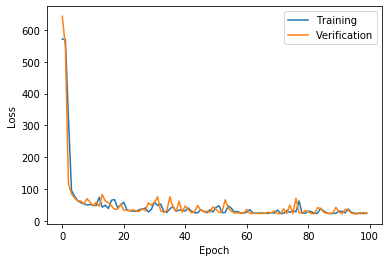

In [5]:
##############################################
# Modeling    
##############################################
from keras import layers, models
from sklearn import preprocessing

def ANN_seq_func(Nin, Nh, Nout):
    # Keras 모델 시작
    model = models.Sequential()
    
    # 입력 계층 노드 수 Nin 개,  은닉 계층의 노드 수 Nh 개, 활성함수는 relu
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin, )))
    
    # 출력 노드 수 Nout 개,  활성함수는  relu) 
    model.add(layers.Dense(Nout, activation='relu'))
    
    # cost함수 - mse(평균 제곱 오차), 최적화 알고리즘 - SGD(확률적 경사하강법)
    model.compile(loss='mse', optimizer='sgd')
    
    return model

##############################################
# Data  학습과 평가용 데이터 불러오기 
##############################################
from keras import datasets

def Data_func():  
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()    # 데이터 정규화  
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    print (X_train.shape, y_train.shape )
    
    return (X_train, y_train), (X_test, y_test)

##############################################
# Plotting  결과 그래프 구현 
##############################################
import matplotlib.pyplot as plt
%matplotlib inline 

##############################################
# Main  회귀 ANN 학습 및 성능 분석 
##############################################
def main():
    Nin = 13
    Nh = 5
    Nout = 1

    model = ANN_seq_func(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=100,
                       validation_split=0.2, verbose=2)
    
    performace_test = model.evaluate(X_test, y_test, batch_size=10)
    print('\nTest Loss -> {:.2f}'.format(performace_test))

    
    history = history.history
    # Cost/Loss  변화 추이 그래프
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()

if __name__ == '__main__':
    main()